**Students' name**

This aim of this course is to review the evolution of image processing tools from hand-crafted methods to deep learning algorithms. The semester is split into four labs :

* **Lab 1** : Introduction to Image Processing Using Hand-Crafted Features
* **Lab 2** : Object detection
* **Lab 3** : Object tracking
* **Lab 4** : Introduction to Deep Learning for image classification and generative model

Let's start with the final chapter of this course!

# Chapter 4. Introduction to Deep Learning for image classification.
(*100 points*)

In the previous laboratories, you learned about basic image handling, as well as the process of generating handcrafted features; this is to say, you generated descriptors of your data that specifically for your machine learning model to perform, for example, face detection, or image classification.  

In this last laboratory, you will get some hands-on practice in deep learning. Now your task becomes more of a data engineer, that will set the data and network parts together for a deep learning network to learn what the data has to say.  

You will be using Google's collab environment to have easy access to a GPU and will use pre-defined datasets accessible from the Tensorflow API. The main advantages that Collab offers is an already set-up environment with all the popular libraries (Keras, TensorFlow, PyTorch, OpenCV) installed, as well as access to a shared GPU for training and inference of your models.

Detailed information about the service can be found on the faq page.

https://research.google.com/colaboratory/faq.html



## 4.1 Setting up the environment:

If you are reading this is, is likely that you already imported the lab's notebook to your google's drive account. The only thing to be sure is that the GPU acceleration is turning on.

For that, go to Edit -> Notebook Settings -> Select "GPU" in the "Hardware accelaration" option.  

Run the code below to check that the GPU is correctly working on the environment and display the GPU's specs.

In [2]:
import tensorflow as tf
import numpy as np

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
!nvidia-smi

2025-05-30 17:41:42.410667: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


SystemError: GPU device not found

As —hopefully— you can see above, you have access to a fully operational GPU with the latest CUDA version (>=12). In addition, the code above imported the TensorFlow library, which is already fully instaled in your environment.


**Content of the notebook:**

The rest of the notebook tries to cover the fundamental parts for training a DL Network for image processing, from the dataset curation to the training and performance evaluation:

* Obtaining and processing data using Tensoflows dataset modules.
* Build a basic deep learning image classifier using Tf.keras
* Visualize the training and validation performance.
* Import and re-train pre-existing networks.




## 4.2 Tensorflow datasets

In the previous labs, you had to download big chunks of data, struggle with local paths, missing data, or inconsistencies in the image formats. In this lab, you will use dataset from tensorflow directly.

__TF Datasets__ are distributed in all kinds of formats and in all kinds of places, and they’re stored in a format that’s ready to feed into a machine learning pipeline. Below, we import the tensorflow_datasets.





In [3]:
import tensorflow_datasets as tfds

If you would like to reproduce what you learn in this notebook locally on your computer, you will need to install both packages:

https://www.tensorflow.org/install

https://www.tensorflow.org/datasets/catalog/overview

In this lab we will be using the latest version of TensorFlow (2.12), is important to know that due to the exponential growth of TensorFlow's modules and main kernel, code written (even in the official TensorFlow documentation) for previous versions (especially before tf2.0) may not be fully compatible with this, or any future release of TensorFlow. So, as good development practice, try always recording the TensorFlow version you used to write your code so *future-you* is able to reproduce your results.

In [4]:
print(tf.__version__)

2.12.0


**TF Datasets** are also in constant development by the community, so first go here and check the updated list of available datasets and their details (features, statistics, etc.): https://www.tensorflow.org/datasets/catalog/overview. Or list them from the TensorFlow environment:

In [4]:
# List the available datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

As you can see, there are many datasets and not only for image processing.

To quickly visualize examples of a given dataset, you can load a given dataset and use the API's function *show_examples*

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.QN3W46_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.QN3W46_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


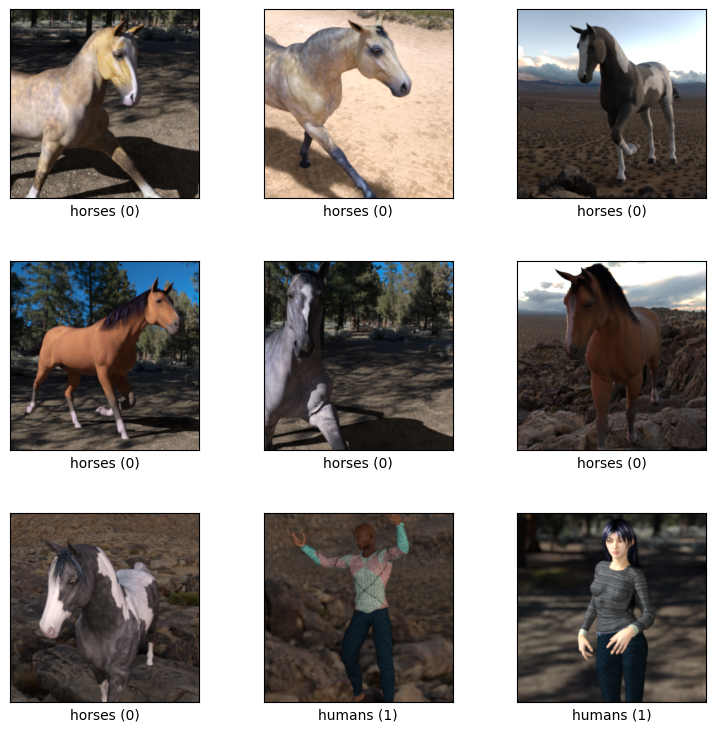

In [5]:
# Yes, someone in the world needed to differentiate betwen horses and humans, and made a full dataset for this purpose.
dataset, dataset_info = tfds.load('horses_or_humans', split='train', with_info=True)
# Check that someone was not exactly consistent with the parameter order between these two functions
fig = tfds.show_examples(dataset, dataset_info)


After downloading a dataset, TensorFlow, or rather the dataset curator, defined a set of useful and predefined transformations (tf.data transformations) such as:

*   .map() — to apply a function to each element.
*   .shuffle() — to shuffle the dataset order.
*   .batch() — to create batches of data, let’s say you have 1000 images in total
*   .repeat() — to repeat elements in the dataset.
*   .prefetch() — to fetch next batch elements to be processed while the previous batch is being processed.

We will use this function ahead for data augmentation and basic training.


## 4.3 Pre-processing the dataset

When training a neural network or a machine learning model, you must always keep in mind that the quality of the training data determines the quality of your model. The data you will encounter in practice will be not clean in most cases, even coming from official repositories. In a nutshell, you have to check for non-uniform data formats (jpg, vs png, tiff, vs, RGB, grey-scale), missing values (or NaNs), outliers, etc. For this reason, the data must be preprocessed in various ways.

For this lab, since we will be using an already curated dataset, we can skip identifying odd samples, and just directly transform our data to the desired input format and split them in our classic train, validation, and test datasets.

However, the images in the downloaded dataset may have different dimensions (size, or even dynamic range). We will then define a function able to:

1.   Resize all the images to a given height and width.
2.   Normalize the dynamic range to [0,1]
3.   Cast our image to the same precision (float32)  

We do this because later, in order to train a convolutional neural network, we have to specify the input dimensions (and the shape of our final dense layer depends on the input dimensions of a CNN) and unify the data scaling for min-max normalization.

In [ ]:
# Load and split the dataset in 80%, 10%, and 10% propportions
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True, as_supervised=True)

We downloaded a new dataset, using `tfds.load()` function:  https://www.tensorflow.org/datasets/api_docs/python/tfds/load.

Please be sure to check the TensorFlow documentation for every function that may look obscure to you.

As you read already, `tfds.load()` provides a high-level interface to split our data in a train, a validation, and a test dataset. In addition, by setting the flag *as_supervised=True*,  we download all the metadata needed to perform supervised learning, which in our case corresponds to the labelled images and the data format.

For a thorough description:

In [ ]:
print(metadata)

**4.3.1 Preprocessing using .map:**

We now can use the `.map` function to apply a transformation to all the elements of the dataset: https://www.tensorflow.org/api_docs/python/tf/data/Dataset .

In [ ]:
def customFormatingFunction(dataset_image, dataset_label):
    # Here we are HARD CODING the input size inside a local function, this is a bad practice.
    # But we did anyway. So, if you actually reading this, be sure not no make the same mistake.
    FIXED_IMG_SIZE = 128
    # cast to tf.float32 precision
    dataset_image = tf.cast(dataset_image, tf.float32)
    # Normalize the pixel values
    dataset_image = dataset_image / 255.0
    # Resize the image
    dataset_image = tf.image.resize(dataset_image, (FIXED_IMG_SIZE, FIXED_IMG_SIZE))
    return dataset_image, dataset_label


The next cell apply our transformation to the datasets. Check the fact that since we split the dataset we need to transform the three datasets!

In [ ]:
norm_train      = raw_train.map(customFormatingFunction)
norm_validation = raw_validation.map(customFormatingFunction)
norm_test       = raw_test.map(customFormatingFunction)

**4.3.2 Data augmentation:**

Data Augmentation is a technique used to expand or enlarge the scope of your dataset.  We apply different transformations to the existing data to expand our dataset so that it will help to train our model better (because the dataset is larger). If done right, it can really increase the performance of your model, or ensure that no overfitting occurs and your model generalizes well. For example, if we want to train a model to learn to differentiate between cats and dogs, learning the colour of the fur (perhaps because our dataset contains lots of black cats, a few black dogs) is a bad idea. We would want our model to learn the shape and relative size of the animal features, presence or absence of pointy ears, etc. So, if we want to prevent the model to use colour as its primary distinguishing parameter, we can use black and white photos or change the brightness parameters; in addition, to avoid orientation bias we can randomly rotate images in our dataset and so on.

At this point, I would recommend you to go on with the lab and then come back to this point and read Tensorsflow's example in data augmentation (It will be really useful for the lab's exercise).

https://www.tensorflow.org/tutorials/images/data_augmentation

and since you are already there, follow the link to the small tutorial in overfitting and underfitting:

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [ ]:
# Example of a custom function to perform data augmentation.
def augment_data(image, label):
  """Returns a processed image and label pair

  takes a single image and the original label.
  """
  # Flip the image.
  image = tf.image.random_flip_left_right(image)
  # Modify the contrast a little bit
  image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
  # Add more augmentation of your choice
  return image, label

train      = norm_train.map(augment_data)
validation = norm_validation.map(augment_data)
test       = norm_test.map(augment_data)


**4.3.3 Data randomization and batching:**

Finally, since we didn't construct the dataset ourselves, to ensure that there's not an ordering bias in our data, for example, let's say that the person who gathered the data saved all the dog pictures of certain dog race first then the second and so on, we need to randomize our data. In addition, we will take small samples called batches, that will help us to train our network down the road.

In [ ]:
# Passed to .shuffle function, it will randomize batches of size shuffle_buffer_size one at the time (for better execution performance)
shuffle_buffer_size = 1024

#batch size of our samples. The new dataset will be stores in "units" or batches of this size.
batch_size = 32

# we care that the train data is randomized, THEN batched in that order.
train = train.shuffle(shuffle_buffer_size).batch(batch_size)

# we don't need randomization in the validation.
validation = validation.batch(batch_size)
test = test.batch(batch_size)

# Prefetching overlaps the preprocessing and model execution of a training step.
# While the model is executing training step s, the input pipeline is reading the data for step s+1
# (Is just for efficiency to keep your precessors working all the time)
train = train.prefetch(tf.data.experimental.AUTOTUNE)

print(train)
print(validation)
print(test)



Be sure that nothing is obscure in this part, we are just formating our data using the high-level function available from TensorFlow.
Again, all the functions used here were taken from the documentation:

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

https://www.tensorflow.org/guide/data_performance#prefetching

<br>

So how does our newly formatted data look like? Let's look at one sample:

In [ ]:
import matplotlib.pyplot as plt
#The jupyter back-end (%matplotlib notebook) not always works fine in collab
%matplotlib inline

# Get the function which converts label indices to string
# This is a glorified dictionart, that translate intergr values to "dog" or "cat"
get_label_name = metadata.features['label'].int2str

#Plot
plt.figure(figsize=(16,16))

for batch in train.take(1):
    for i in range(32):
        image, label = batch[0][i], batch[1][i]
        plt.subplot(4,8,i+1)
        plt.imshow(image.numpy())
        # label of our image
        plt.title(get_label_name(label.numpy()))
        plt.grid(False)
    break

# Just to check the dynamic range (should fo from 0 to 1)
# and the size and number of channels of our images (128,128,3)
print(image.shape)
print(np.min(image))
print(np.max(image))

**Summary**  

At this point, we have the data ready to be deployed into a machine learning framework. Just as we did in previous laboratories but this time using only TensorFlow's API. In the next section, we will now use tf.keras, to construct a convolutional neural network and perform end to end classification.

 ## 4.4 Building an image classifier model using convolutional neural networks and tf.keras

In the following section, we will have a very **hands-on** approach on how to build a convolutional neural network using tf.keras API. This section is not meant to provide a rigorous introduction to deep learning but only to highlight and give practical examples of the core components/concepts that you will need **to search** to go deeper into this topic— It is of course impossible to fit a full course on DL in a notebook. At each step, we will try to highlight external resources to read more in detail about the concepts used in the following tutorial.

For instance:

https://cs231n.github.io/convolutional-networks/


**Why tf.keras?** Keras is an extremely popular high-level API for building and training deep learning models. It’s used for fast prototyping, state-of-the-art research and production. Before the alpha release of TensorFlow 2.0 Keras worked as a stand-alone library for NNs design and prototyping. Nowadays, Keras is integrated tightly with the rest of TensorFlow, so you can access TensorFlow’s features whenever you want. A set of standard packaged models (for example, linear or logistic regression, gradient boosted trees, random forests) are also available to use directly (implemented using the tf.estimator API). If you’re not looking to train a model from scratch, you can also use **transfer learning** to train a Keras or an *Estimator model* using modules from the TensorFlow Hub. https://www.tensorflow.org/hub.

In [ ]:
from tensorflow import keras

**Why Convolutional Neural Networks?**
The main structural feature of RegularNets (fully connected networks like MLP's) is that all the neurons are connected to each other. When it comes to classifying images — let's say with size 64x64x3 — fully connected layers need 12288 weights (free parameters to learn) only in the first hidden layer. The number of weights will be even bigger for images with size 225x225x3 = 151875 (duh). Networks having a large number of parameter face several problems, e.g., slower training times, training instability, much bigger chances of overfitting, etc.

The main functional difference of convolution neural network is that the main image matrix (representation of our first connected layer) can be reduced to a matrix of much lower dimension in the first layer itself, through an operation called Convolution. For e.g. an image of 64x64x3 can be reduced to 1x1x10. Afterwards, followed by a fully connected layer that could be added to this highly reduced convoluted space.

Below, we do a brief recap of the important layers that you can define in a CNN.

**Convolution**

Remember the Sobel operator for edge detection? In a previous lab, you already worked with the concept of convolution for edge detection. In that problem, the Sobel operator defines a convolution window (or kernel) which computes the spatial derivative in the x and y -axis. In a convolutional neural network, however, instead of predefining this convolutional kernels, they are learnt from your data. This means that in one of your layers the network can automatically learn to generate — similar— Sobel operators if needed, or any other convolution that helps to solve your classification or regression problem.

Simplified, a convolution layer is a matrix of dimension smaller than the input matrix. It performs a convolution operation with a small part of the input matrix having the same dimension. The sum of the products of the corresponding elements is the output of this layer.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28094927/padding.gif">

<sup> Image taken from  https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/</sup>

**Activation function**

Activation functions introduce non-linearities in the data transformation pipeline. Without such non-linearities, a neural network would be equivalent to a linear transformation and could be reduced to a matrix multiplication. They are usually placed after a convolution layer. The list of activation functions impletmented in TF are given in the doc:

https://www.tensorflow.org/api_docs/python/tf/keras/activations

The activation functions choice might dramatically influence your performance. When you are designing a CNN, you should check both the shape and the output domain of the activation function. For example, the output of a ReLu function is greater than 0 while Tanh outputs values between -1 and 1.

**Pooling layer**

 There are basically two types of Pooling: **Max Pooling** and **Average Pooling.**

Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.

Max Pooling can serve as a sort of Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction. Hence, we can say that usually, Max Pooling performs a better than Average Pooling.
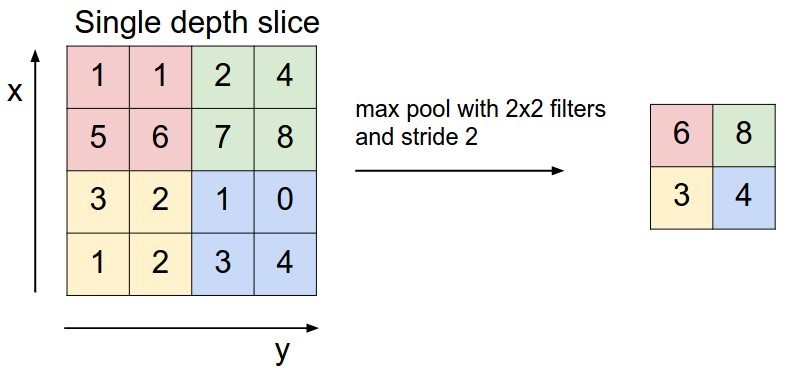



**Stride** is the length that our filter is translated (fixed to move across and down) pixel to pixel. With higher stride values, we move large number of pixels at a time and hence produce smaller output volumes.

**Flattening**

Flattening, as the name suggests, simply converts the last convolutional layer into a one-dimensional NN layer. It sets the stage for the actual predictions.
<br>
<br>
Finally, all of the principles regarding NNs (i.e. weights, activation, loss, optimization, backpropagation, batch size and regularization) apply to CNNs as well and are no different from those for fully connected networks.


### 4.4.1 Defining a convolutional neural network in tf.keras

The code below defines a (not very good)  CNN using only the concepts discussed before.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. The batch size is automatically added by TF as the fourth dimension.

In this example, we already formatted our data to have a shape of (128, 128, 3), we then just have to let the CNN process inputs of this shape. We do this by passing the argument shape to our first layer.

To complete our model, we will feed the last output tensor from the convolutional base (of shape (28, 28, 64)) into one Dense layer (or fully connected layer) to perform classification. You can think this as taking all the 2d processed filters and then do a 1-d signature, which then should be classified (as a dog, or a cat).  Dense layers take vectors as input (which are 1D), while the current output is a 2d tensor (vector, 2d because we have two output classes). Hence, we use a final Dense layer with 2 outputs and a softmax activation.

In [ ]:
# Creating a simple CNN model in keras using functional API
def create_model():

  # Harcoded image size
  IMG_SIZE = 128
  FIX_IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

  # We fix out input shape in here, no batch size required
  img_inputs = keras.Input(shape=FIX_IMG_SHAPE)

  # How to read this line:
  # First convolution layer
  # The number of filters is 16 which defines the output space
  # they are 3 by 3 filters (kernel size)
  # and have a rectified liner unit as activation
  # we plug this after 'img_input' layer
  conv_1 = keras.layers.Conv2D(16, (3, 3), activation='relu')(img_inputs)


  # Maxpool layer of size 2 by 2.
  # The stride is set as sdefault (1)
  # We plug this after our first convolution
  maxpool_1 = keras.layers.MaxPooling2D((2, 2))(conv_1)


  # Second pair convolution-max pooling layers.
  # Check that we now set 64 filters (sanity check).
  conv_2 = keras.layers.Conv2D(32, (3, 3), activation='relu')(maxpool_1)
  maxpool_2 = keras.layers.MaxPooling2D((2, 2))(conv_2)

  # We finished with another convolution
  conv_3 = keras.layers.Conv2D(32, (3, 3), activation='relu')(maxpool_2)

  # Finally we flatten the output of conv_3 to become a 1d vector.
  flatten = keras.layers.Flatten()(conv_3)

  # That then we pass to a Densely connected layer with 32 neurons
  # Those 64 neurons with the activation function should now be our "clasification layer"
  dense_1 = keras.layers.Dense(32, activation='relu')(flatten)

  # which is then connected to our LAST layer with only 2 neurons (because we have two classes)
  # softmax will then activate only the one with highest probability.
  output = keras.layers.Dense(metadata.features['label'].num_classes, activation='softmax')(dense_1)

  # Finally, We just need to give in input and out layer to the model constructor function
  # All the layers are already connected to the network graph.
  model = keras.Model(inputs=img_inputs, outputs=output)

  return model

In [ ]:
simple_model = create_model()

# Use the summary function to display (and check) your network
simple_model.summary()

Above we should be able to see the architecture in detail, from the input data to the last classification layer.

From here, one important metric to always keep your eye is the number of trainable parameters. Any measure describing how "big" your network is must be related to the number of free parameters, rather than the number of layers.

The more the free parameters (trainable), more are the chances of overfitting.

In the summary above, you see the huge number of free parameters of the Dense layer in comparison to the convolution layers.

In here a nice and brief explanation on how these parameters scale:

https://towardsdatascience.com/counting-no-of-parameters-in-deep-learning-models-by-hand-8f1716241889



### 4.4.2 Training

So we have our architecture set-up, and we would like to train our new network. A priori, in order to train your network you just need two things: a loss function and an optimizer algorithm.

The end goal of our classifier is to reduce the difference between the predicted output and the ground-truth (label). The metric or function that quantifies this is the so-called "Cost function" or **Loss function**. The role of the **optimizer** is then to update the weight parameters (learnable parameters) to minimize the loss function.

There are several pre-defined loss functions, each one penalizing slightly differently wrong outputs, and therefore making them more suitable in different scenarios. In addition, you could make your own tailored loss function.

For a full list of the available loss functions:

https://www.tensorflow.org/api_docs/python/tf/keras/losses

Feel free to go and read all about each one of the listed loss functions and chose your favourite one.

On the other hand, the optimizer defines the strategy on how the weights are updated in each iteration, based on the predicted loss. New optimizers are not as easy to define as new loss functions.

In here a list of the available optimizers implemented in Tensorflow

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

As you can imagine, the training performance will depend on the selected pair: optimizer, loss function. Selecting one will depend greatly on your data and the type of problem (binary or multiclass classification, regression, etc.). A quite updated lecture on this:

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [ ]:
import os

def train_model(model):


    # The way to define both parameters is by "compiling" our model
    # This will set all the necessary internal modules to compute the forward (prediction)
    # and back (derivation) propagation steps
    # The metric(s) parameter serves as an output metric indicator of the performance
    # at each iteration. (See tensorboard subsection below)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])



    # Creating Keras callbacks
    # See tensorboard subsection
    # In here we ask to log at each iteration the performance of our training.
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
        'training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', epoch=2)
    os.makedirs('training_checkpoints/', exist_ok=True)


    # We can also stop our training after a given number of iterations.
    # For instance if the model converged (to a minima), or even diverged.
    early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience=5)


    # We perform the training by calling the .fit function
    # We can directly pass the train and validation objects, to the .fit() function,
    # by calling .repeat() on them so that the training keeps looping over the
    # dataset for the specified number of epochs.
    
    history = model.fit(train.repeat(),
              epochs=15,
              steps_per_epoch=steps_per_epoch,
              validation_data=validation.repeat(),
              validation_steps=validation_steps,
              callbacks=[tensorboard_callback,
                         model_checkpoint_callback,
                         early_stopping_checkpoint])

    return history

Above we have enclosed the compilation, callback logs and the training fit in a single function. However, as you should notice we still need to define a couple of variables up there:

The first unknown (and not declared yet) variable is `log_dir`. This variable is a directory where you will save "locally" the information of the training metrics. The directory need to follow a specific format so tensorflow can display correctly our training metric data.

The second is the `steps_per_epoch` and `validation_steps`. This is defined because we "encapsulated" our data in batches, remember? So:

*  `steps_per_epoch`: It defines the number of batches on which we train our model in one epoch. It's calculated by dividing the number of training examples by the size of each batch.

* `validation_steps`:  It defines the number of batches on which we validate our model in one epoch. It's calculated by dividing the number of validation examples by the size of each batch.



In [ ]:
import datetime, os

# Clear any logs from previous runs
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir)

SPLIT_WEIGHTS = (8, 1, 1)
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples * weight//10 for weight in SPLIT_WEIGHTS
)

steps_per_epoch = round(num_train/batch_size)
validation_steps = round(num_val/batch_size)

print('Number of examples in the train set:', num_train)
print('Number of examples in the validation set:', num_val)
print('Number of examples in the test set:', num_test)


Now that we have defined these variables as (WARNING) global variables in the environment, we can call our training.  

Appreciate the fact that you don't need to train this in your laptop's CPUs.

In [ ]:
history = train_model(simple_model)

Once the training is over, you can read the progress of your training (accuracy and loss).

To visualize this directly you can plot both the training and validation accuracy:

In [ ]:
# we can extract both vectors from the history history dictionary
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Same for the loss performance
loss     = history.history['loss']
val_loss = history.history['val_loss']

# First is the accuracy rangin from 0 to 1.
# Since we have 2 clases, we expect that we can achieve something better than 0.5
# which is the performance of doing a completely random choice...
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# The training losss then will give us an insight of the progress done at each epoc.
# we can decide for instance that more epocs were necessary... or less.
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


These graphs give us insights into how well our model was trained. It is necessary to ensure that both the training and validation accuracies increase and losses decrease.

For instance, if the **training accuracy is high** but the **validation accuracy is low**, then it's a typical case of overfitting. You may have to increase your training dataset by performing data augmentation or downloading more images from the internet. You can also try out other model architectures which include regularisation techniques like Dropout and BatchNormalisation.
If on the other hand your training accuracy and validation accuracy both are higher but, your validation accuracy is slightly higher then maybe your validation dataset comprises of ideal images of the given classes.

Take for example the history of one training run on another test network (yours may be different)

We can see the signs of overfitting on these two graphs.

If this is not clear to you, this is the moment to go back to one of the suggested lectures:

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

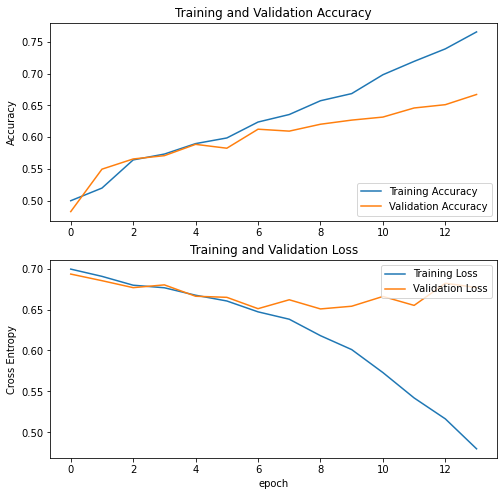

**Tensorboard**

Another option to check our learning curves is to use Tensorboard. Tensorboard works by reading the event files (which you saved beforehand) where Tensorflow writes some summary data. Tensorboard is already available and needs first to be loaded (in collab: %load_ext tensorboard) and then summoned (%tensorboard --logdir [dir]) where [dir] is the event files location.

One cool thing is that you can check the graph evolution while your model is training, so if something starts looking disastrous, you can always early terminate yourself the training.

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

## 4.5 Using pre-trained models

In the previous section, we trained a simple CNN which gave us an accuracy of ~70%. We can easily do much better than this by using larger and more complex architectures. There are many open-source pre-trained networks available for the similar image classification task as of ours.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. We can either use the pre-trained model as it is or perform transfer learning using the pre-trained model. The intuition behind transfer learning is that if this model was trained on a large and general enough dataset, then this model will effectively serve as a generic model of the visual world. We can leverage these learned features maps without having to train a new large model on a large dataset.

https://keras.io/applications/


**Downloading a pre-trained model**

We will create a base model from the VGG16 model developed at Google, and pre-trained on the ImageNet dataset, a large dataset of 1.4M images and 1000 classes of web images. This model has already learned the basic features that are common in 1000 objects that we see daily. Hence, it has a strong feature extraction capability. We download a network that doesn’t include the classification layers (Dense layers) at the top, by specifying include_top=False argument, because we only want to use the feature extraction portion of these pre-trained convnets (convolutional base) since they are likely to be generic features and learned concepts over a picture. The classification part of the pre-trained model is often specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

In [ ]:
from tensorflow import keras

# Create the base model from the pre-trained model VGG16
# include_top means that you will also include the last top layer (the clasification layer)
# We set to false, so we can override this and inlcude OURS classification layer
# We need als oto define que input shape correctly
base_pre_trained_model = keras.applications.vgg16.VGG16(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')

**Adding a classification layer**

While downloading the pre-trained model we had removed the classification part of it, by specifying include_top=False parameter, since it is specific to the set of classes on which the model was trained. We now add a new classification layer which would be specific to our dog vs cat classification. We plug these new layers on top of our base model using Keras’s Sequential API.

In [ ]:
def build_pirated_model():

    # Using Sequential API to stack up the layers
    base_pre_trained_model.trainable = False
    model = keras.Sequential([
        base_pre_trained_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(metadata.features['label'].num_classes,
                           activation='softmax')
    ])

    # Compile the model to configure training parameters
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

new_VGG16_model = build_pirated_model()
new_VGG16_model.summary()

The code is very easy to understand:

We are generating a new network passing first, the VGG16 network without the classifciation layer, then we are using a Pooling layer 2d (keras.layers.GlobalAveragePooling2D()) layer and convert it to a single 2048-element vector per image. After this, we add a keras.layers.Dense() for the single prediction of the 2 classes.

It’s important to notice that we freeze the base model weights before we compile and train the model, we do this by base_pre_trained_model.trainable = False.

Freezing means that we will not let the optimizer updating or modifying the pretarined network. The weights remain trained with it's original database (which was much larger and richer than our). Because of this, the only "trainable parameters" are those from the last added layers. We then train the model using the same steps that we used to train our simple CNN.


In [ ]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir)

# Creating Keras callbacks
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    'training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', epoch=5)
os.makedirs('training_checkpoints/', exist_ok=True)
early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience=5)


history = new_VGG16_model.fit(train.repeat(),
                              epochs=15,
                              steps_per_epoch = steps_per_epoch,
                              validation_data=validation.repeat(),
                              validation_steps=validation_steps,
                              callbacks=[tensorboard_callback,
                              model_checkpoint_callback,
                              early_stopping_checkpoint])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**But wait**, our new model is not exactly doing much better. This is likely because re-training only the very last layers is not enough to the network to adapt itself to our new dataset, we can then fine tune further by training more and more layers from the original base network, trying to find a balance between learning from our dataset and exploiting the pretrained weights.  

In [ ]:
# Save the previous model new_VGG16_model with a very descriptive name
new_VGG16_model.save('new_VGG16_model_test1_didnt_work_cest_la_vie.h5')

In [ ]:
# then you can load back this model to compare
load_model_failure = keras.models.load_model('new_VGG16_model_test1_didnt_work_cest_la_vie.h5')

In [ ]:
def build_pirated_fine_tuned_model(fine_tune_at = 17):
    # We un-freeze all the layers
    base_pre_trained_model = keras.applications.vgg16.VGG16(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')
    base_pre_trained_model.trainable = True
    # Let's take a look to see how many layers are in the base model
    print("Number of layers in the base model: ", len(base_pre_trained_model.layers))

    # Fine tune from this layer onwards
    print("We are fine tuning from the {} layer".format(fine_tune_at))

    # Freeze all the layers before the `fine_tune_at` layer
    for layer in base_pre_trained_model.layers[:fine_tune_at-1]:
        layer.trainable =  False

    # Using Sequential API to stack up the layers
    model = keras.Sequential([
        base_pre_trained_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(metadata.features['label'].num_classes,
                           activation='softmax')
    ])


    # Compile the model to configure training parameters
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

fine_tunned_VGG16_model = build_pirated_fine_tuned_model(18)
fine_tunned_VGG16_model.summary()


In [ ]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir)

# Creating Keras callbacks
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    'training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', epoch=5)
os.makedirs('training_checkpoints/', exist_ok=True)
early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience=5)


history_fine = fine_tunned_VGG16_model.fit(train.repeat(),
                                  steps_per_epoch = steps_per_epoch,
                                  epochs=25,
                                  initial_epoch = 5,
                                  validation_data=validation.repeat(),
                                  validation_steps=validation_steps,
                                  callbacks=[tensorboard_callback,
                                  model_checkpoint_callback,
                                  early_stopping_checkpoint])


In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

initial_epochs=5

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Here we can visualize again the 3 networks together and evaluate, overfitting and accuracy.

In [ ]:
%tensorboard --logdir logs/fit

In summary: When working with a small dataset, it is common to leverage the features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier are updated during training. In this case, the convolutional base extracts all the features associated with each image and we train a classifier that determines, given these set of features to which class it belongs.

https://www.tensorflow.org/tutorials/images/transfer_learning

## 4.6 Exercise. Your turn.
(*60 points*)


Now is time for you to do an intense copy-pasting.


**From our examples above, there's quite a bit of room for improvement.** From changing the architecture in 4.4.1, to train for more epochs, use different loss functions, optimization algorithm, and a different network for transfer learning.   

**Your exercise is to re-do everything done so far (and tweak it) using nother dataset, and explain to us what you did, and why.**

**The solution will NOT be evaluated as successful if you did exactly what it was done in the examples of this notebook. It is expected that from the information provided above you are able to search and enhance/modify any step so it suits better your classification problem**

Below the specification of what your model should deploy. Each one of those points will count as an individual exercise.  

1. Choose a **new** dataset from TFDatasets.   <br />
*   The dataset should contain at least **3 classes** for classification (num_classes=3).
*   The image should have a resolution bigger than (64,64) and 3 color channels (RGB)
*   After dowloading the dataset, display all the relevant information of the dataset and explain the composition of the dataset.
<br />
<br />
2. Perform any pre-processing required and explain each step.
*  The data need to be correctly normalized and reshaped depending on your network architecture.
*  Split the dataset in relevant datasets and explain why such split was chosen.
*  Perform data augmentation to enhance the dataset and avoid relevant overfitting. Explain what and why you performed any relevant transformation. Don't be limited to the transformation in our example.
<br />
<br />
3. Build an image classifier from scratch.
* In here you have the freedom to explore and create a network architecture using the basic layers in the example or from other sources.
* You have to describe in detail the network architecture.
* Your network, however, cannot have more than **3,000,000 trainable parameters**. Show that it doesn't.
* Provide relevant visualizations of the training accuracy or loss function over the training process.
* Discuss in detail if any overfitting is present, and the evolution of the training.
* The score of your work will be based on the achieved accuracy, but more importantly, on how is described and the results are presented (and that no weird training behaviours are present).
<br />
<br />
4. Download any of the pre-trained models available on TensorFlow (different from VGG16, which is not really good anyway) and fine-tune the network for your classification problem.
*  You can use any network suited for your input data.
* Describe in detail what's the network architecture and the sources from where it came from.
* The total number of frozen parameters should be more than 65% of the total trainable parameters of the network.
* Discuss in detail if any overfitting is present, and the evolution of the training.


Finally, **you need to save both models and include them when uploading the solution to moodle**. No score will be granted if we cannot evaluate your network in the held-out data.




**Solution Start**   

**Important** Add the solution for each step below. If you need to make tests and preliminary code, make a copy of the notebook and in here just include your solution

**Important** Explain each step of your solution using the markdown cells.
Any function or code rutine not properly explained or commented, will not be considered as your solution.  

### 4.6.1 Choose a new dataset from TFDatasets.

In [5]:
def splittedDatasets(*args):
    """Returns three datasets: train validation test.
     args:
          the splits (percentage of the data) are given in the arguments.
    """
    # Load both labeled parts of the STL10 dataset
    (train_ds, test_ds), _= tfds.load(
        'stl10',
        split=['train', 'test'],
        with_info=True,
        as_supervised=True
    )

    # Combine the 5000 train + 8000 test = 13,000 labeled samples
    full_dataset = train_ds.concatenate(test_ds)

    # Shuffle and compute sizes
    full_dataset = full_dataset.shuffle(13000, reshuffle_each_iteration=False)
    total_size = 13000
    train_size = int(args[0] * total_size)
    val_size = int(args[1] * total_size)

    # Split the dataset
    train = full_dataset.take(train_size)
    validation = full_dataset.skip(train_size).take(val_size)
    test = full_dataset.skip(train_size + val_size)

    return train, validation, test


In [6]:
train, validation, test = splittedDatasets(0.7,0.15,0.15)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

2025-05-30 17:45:39.101294: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Shuffling /home/capittet/tensorflow_datasets/stl10/incomplete.WFJAOA_1.0.0/stl10-train.tfrecord*...:   0%|    …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/capittet/tensorflow_datasets/stl10/incomplete.WFJAOA_1.0.0/stl10-test.tfrecord*...:   0%|     …

Generating unlabelled examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/capittet/tensorflow_datasets/stl10/incomplete.WFJAOA_1.0.0/stl10-unlabelled.tfrecord*...:   0%…

Dataset stl10 downloaded and prepared to /home/capittet/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.


#### Let's see what the dataset is like

In [8]:
# Load info only
_, info = tfds.load("stl10", with_info=True, as_supervised=True)
print("Dataset Name:", info.name)
print("Total Examples in STL10:")
print(" - Train:", info.splits['train'].num_examples)
print(" - Test:", info.splits['test'].num_examples)
print(" - Unlabelled:", info.splits['unlabelled'].num_examples)
print("\nImage Shape:", info.features['image'].shape)
print("Number of Classes:", info.features['label'].num_classes)
print("Class Labels:", info.features['label'].names)
print("Number of training samples:", tf.data.experimental.cardinality(train).numpy())
print("Number of validation samples:", tf.data.experimental.cardinality(validation).numpy())
print("Number of test samples:", tf.data.experimental.cardinality(test).numpy())



Dataset Name: stl10
Total Examples in STL10:
 - Train: 5000
 - Test: 8000
 - Unlabelled: 100000

Image Shape: (96, 96, 3)
Number of Classes: 10
Class Labels: ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']
Number of training samples: 9100
Number of validation samples: 1950
Number of test samples: 1950


For simplicity we have built our train, validation and test set on the train and test and have not used the unlabeled samples. The number of pixels is larger than 90, with 3 channels and 10 classes so we meet the expectations

# Missing vizualisation of image + Label + Look at potential class imbalance and if there is some use F1 score

### 4.6.2 Perform any pre-processing required and explain each step.


In [36]:
IMG_SIZE = 128
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Define augmentation separately
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.GaussianNoise(0.05),
])

# With augmentation (for training only)
def preprocess_train(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = data_augmentation(image)
    return image, label

# Without augmentation (for val/test)
def preprocess_eval(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label



In [37]:
train_processed = train.map(preprocess_train, num_parallel_calls=AUTOTUNE)
validation_processed = validation.map(preprocess_eval, num_parallel_calls=AUTOTUNE)
test_processed = test.map(preprocess_eval, num_parallel_calls=AUTOTUNE)

# Shuffle, batch, prefetch
train_loader = train_processed.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
validation_loader = validation_processed.batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_loader = test_processed.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [38]:
# Check dimensions of train/validation/test batches
for images, labels in train_loader.take(1):
    print("Train images shape:", images.shape)
    print("Train labels shape:", labels.shape)

for images, labels in validation_loader.take(1):
    print("Validation images shape:", images.shape)
    print("Validation labels shape:", labels.shape)

for images, labels in test_loader.take(1):
    print("Test images shape:", images.shape)
    print("Test labels shape:", labels.shape)


2025-05-30 18:17:27.027616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_50' with dtype resource
	 [[{{node Placeholder/_50}}]]
2025-05-30 18:17:27.028340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_48' with dtype resource
	 [[{{node Placeholder/_48}}]]


Train images shape: (32, 128, 128, 3)
Train labels shape: (32,)


2025-05-30 18:17:27.991741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2025-05-30 18:17:27.992541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_22' with dtype string and shape [2]
	 [[{{node Placeholder/_22}}]]


Validation images shape: (32, 128, 128, 3)
Validation labels shape: (32,)


2025-05-30 18:17:28.609472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2025-05-30 18:17:28.610234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


Test images shape: (32, 128, 128, 3)
Test labels shape: (32,)


# Explanations
+ No data augmentation on validation + test set
+ 128 standard

### 4.6.3 Build an image classifier from scratch.

In [39]:
from tensorflow import keras
from tensorflow.keras import regularizers
# Creating a simple CNN with regularization model in keras using functional API
def create_model(reg_lambda=0.001):

    # Fixed image size expected by the model
    IMG_SIZE = 128
    FIX_IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

    # Input layer for RGB images of shape 128x128
    img_inputs = keras.Input(shape=FIX_IMG_SHAPE)

    # 1st Convolutional Block: Conv + MaxPooling
    conv_1 = keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(reg_lambda))(img_inputs)
    maxpool_1 = keras.layers.MaxPooling2D((2, 2))(conv_1)

    # 2nd Convolutional Block: Conv + MaxPooling
    conv_2 = keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(reg_lambda))(maxpool_1)
    maxpool_2 = keras.layers.MaxPooling2D((2, 2))(conv_2)

    # 3rd Convolutional Layer (no pooling after this one)
    conv_3 = keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(reg_lambda))(maxpool_2)

    # Flatten the output to feed into dense layers
    flatten = keras.layers.Flatten()(conv_3)

    # Dense (fully connected) layer
    dense_1 = keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(reg_lambda))(flatten)

    # Output layer: number of neurons = number of classes (STL10 has 10)
    output = keras.layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(reg_lambda))(dense_1)

    # Create model from input to output
    model = keras.Model(inputs=img_inputs, outputs=output)
    return model

In [40]:
# Do not delete this, here we print the model information. Be sure to explain the architechture.
first_model = create_model()
first_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248

In [22]:
# All the training process should be self-contained in one function
# This doesn't mean you cannot create helping funtions and make it MODULAR
def train_model(model,*args):
    # Compile the model with optimizer, loss, and metrics
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Prepare logging directory for TensorBoard
    log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Directory and pattern for saving model checkpoints
    os.makedirs('training_checkpoints/', exist_ok=True)
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.weights.h5',
    save_weights_only=True,
    save_best_only=False,
    monitor='val_loss',
    verbose=1
    )



    # Stop training if no improvement in validation loss for 5 epochs
    early_stopping_checkpoint = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Calculate steps per epoch (needed for .repeat()ed datasets)
    steps_per_epoch = tf.data.experimental.cardinality(train_loader).numpy()
    validation_steps = tf.data.experimental.cardinality(validation_loader).numpy()

    # Train the model
    with tf.device('/GPU:0'):er
      history = model.fit(
          train_loader.repeat(),
          epochs=100,
          steps_per_epoch=steps_per_epoch,
          validation_data=validation_loader.repeat(),
          validation_steps=validation_steps,
          callbacks=[
              tensorboard_callback,
              model_checkpoint_callback,
              early_stopping_checkpoint
          ]
      )
    return history


In [23]:
import os, datetime
history = train_model(first_model)

Epoch 1/100


2025-05-30 18:01:29.550116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2025-05-30 18:01:29.550796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_51' with dtype resource
	 [[{{node Placeholder/_51}}]]


283/285 [============================>.] - ETA: 0s - loss: 2.1456 - accuracy: 0.2214

2025-05-30 18:01:36.185026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype string and shape [2]
	 [[{{node Placeholder/_20}}]]
2025-05-30 18:01:36.185656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_21' with dtype string and shape [2]
	 [[{{node Placeholder/_21}}]]



Epoch 1: saving model to training_checkpoints/weights.01-1.79.weights.h5
285/285 [==============================] - 8s 23ms/step - loss: 2.1446 - accuracy: 0.2213 - val_loss: 1.7884 - val_accuracy: 0.3369
Epoch 2/100
283/285 [============================>.] - ETA: 0s - loss: 1.7928 - accuracy: 0.3429
Epoch 2: saving model to training_checkpoints/weights.02-1.74.weights.h5
285/285 [==============================] - 6s 22ms/step - loss: 1.7927 - accuracy: 0.3430 - val_loss: 1.7396 - val_accuracy: 0.3456
Epoch 3/100
282/285 [============================>.] - ETA: 0s - loss: 1.7031 - accuracy: 0.3792
Epoch 3: saving model to training_checkpoints/weights.03-1.60.weights.h5
285/285 [==============================] - 6s 22ms/step - loss: 1.7033 - accuracy: 0.3793 - val_loss: 1.6022 - val_accuracy: 0.4200
Epoch 4/100
283/285 [============================>.] - ETA: 0s - loss: 1.6581 - accuracy: 0.4005
Epoch 4: saving model to training_checkpoints/weights.04-1.56.weights.h5
285/285 [===========

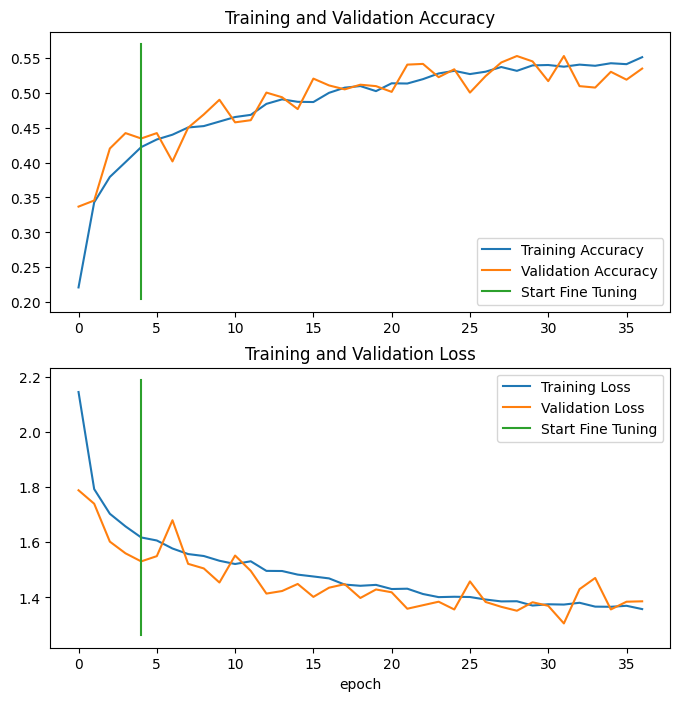

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

initial_epochs=5

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Print all the relevant information to show that no overfitting is present,  either using tensorboard or any self-made function.

Discuss the results in detail.

We observe that the training loss is smoothly going down. 
+ What is the best accuracy + At what epoch

What we did to reduce overfitting: Data augmentation, regularization

### 4.6.4 Download any of the pre-trained models available on TensorFlow and fine-tune the network for your classification problem.



# IMPORTANT
# J'ai pas fait cette partie bien du tout mais je pense le step bien c'est d'importer la fonction de preprocessing du model en question et juste d'ajouter de la data augmentation

In [48]:
# Ensures proper preprocessing
from tensorflow.keras.applications.resnet50 import preprocess_input

def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = preprocess_input(image)  # VERY IMPORTANT
    return image, label


train_pretrained = train.map(preprocess)
validation_pretrained = validation.map(preprocess)
test_pretrained = test.map(preprocess)
# Shuffle, batch, prefetch
train_loader_pretrained = train_pretrained.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
validation_loader_pretrained  = validation_pretrained.batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_loader_pretrained = test_pretrained.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [41]:
def build_pretrained_model(fine_tune_at=100, reg_lambda=0.001, num_classes=10):

    # Load the ResNet50 base model (exclude top = no final dense layers)
    base_model = keras.applications.ResNet50(
        input_shape=(128, 128, 3),
        include_top=False,
        weights='imagenet'
    )

    # Freeze all layers initially
    base_model.trainable = True

    print("Number of layers in ResNet50 base model:", len(base_model.layers))
    print(f"Fine-tuning from layer {fine_tune_at} onward.")

    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    # Input
    inputs = keras.Input(shape=(128, 128, 3))

    # Optional preprocessing layer (ResNet expects inputs scaled in a specific way)
    x = keras.applications.resnet50.preprocess_input(inputs)

    # Base model
    x = base_model(x, training=False)

    # Custom head
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(
        64, activation='relu',
        kernel_regularizer=regularizers.l2(reg_lambda)
    )(x)
    x = keras.layers.Dropout(0.5)(x)  # Optional regularization
    outputs = keras.layers.Dense(
        num_classes,
        activation='softmax',
        kernel_regularizer=regularizers.l2(reg_lambda)
    )(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [49]:
new_model = build_pretrained_model()
new_model.summary()

# Setup callbacks and training like you already do
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir, exist_ok=True)

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    'training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1
)
early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Calculate steps per epoch (needed for .repeat()ed datasets)
steps_per_epoch = tf.data.experimental.cardinality(train_loader).numpy()
validation_steps = tf.data.experimental.cardinality(validation_loader).numpy()

# Fit the model
history = new_model.fit(
    train_loader_pretrained.repeat(),
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=validation_loader_pretrained.repeat(),
    validation_steps=validation_steps,
    callbacks=[tensorboard_callback, model_checkpoint_callback, early_stopping_checkpoint]
)


Number of layers in ResNet50 base model: 175
Fine-tuning from layer 100 onward.
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 tf.__operators__.getitem_8   (None, 128, 128, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_8 (TFOpLambd  (None, 128, 128, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                    

2025-05-30 18:27:20.046736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_23' with dtype int64 and shape [2]
	 [[{{node Placeholder/_23}}]]
2025-05-30 18:27:20.047371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_21' with dtype string and shape [2]
	 [[{{node Placeholder/_21}}]]


285/285 [==============================] - ETA: 0s - loss: 2.4364 - accuracy: 0.0935

2025-05-30 18:28:16.115630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_24' with dtype int64 and shape [2]
	 [[{{node Placeholder/_24}}]]
2025-05-30 18:28:16.116501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]



Epoch 1: saving model to training_checkpoints/weights.01-2.37.hdf5
285/285 [==============================] - 66s 208ms/step - loss: 2.4364 - accuracy: 0.0935 - val_loss: 2.3656 - val_accuracy: 0.0867
Epoch 2/5
133/285 [=============>................] - ETA: 26s - loss: 2.3566 - accuracy: 0.1022

KeyboardInterrupt: 

In [ ]:
history = train_model(new_model)

Print all the relevant information to show that no overfitting is present,  either using tensorboard or any self-made function.

Discuss the results in detail.

**Solution ends**

## 4.7 Variational Autoencoder : VAE
(*40 points*)


In the following section, we will cover another aspect of machine learning which manages the modeling aspect. The goal is to build a *model* that is capable of generating a new data sample that belongs to some learned distribution.
There exist multiple sorts of generative models, but we will only consider the *Variational Autoencoder* or *VAE* for short.

### 4.7.1 Network

Variational Autoencoder model is composed of two components:

  1. The encoder takes an image as input and predicts the parameters of a latent space, i.e. a space that describes the inputs with latent variables. It is assumed that the latent variables follow a multivariate gaussian distribution.
  2. The decoder reconstructs the data from the latent space.

The figure below shows the overall picture of a variational autoencoder. On the left side, the job of the *encoder* is to predict the *mean* and *variance* that represents the input image in the latent space. On the right side lies the decoder which reconstructs the image from the latent variable. The sampling step in the middle draws samples from the prior distribution configured with the output of the encoder.

![](https://miro.medium.com/max/3374/1*22cSCfmktNIwH5m__u2ffA.png)


**Background**

The concept of a *Variational Autoencoder* has been presented in 2013 by [Kingma et al.](https://arxiv.org/abs/1312.6114) and [Rezende et al.](https://arxiv.org/abs/1401.4082) and falls into the *unsupervised learning*  category, meaning no label is required to learn the data distribution.

Considering a probability framework, a variational autoencoder contains two components: a specific probability model of the data $x$ and latent variable $z$. The latent space can be seen as a compact representation of the data (*i.e. image compression*). The joint probability of the model is defined as $p\left(x, z\right) = p\left(x | z\right)p\left(z\right)$. New datapoints can then be generated as follow:

- Draw latent variable $z_i \sim p\left(z\right)$
- Draw datapoint $x_i \sim p\left(x | z\right)$

From this, we want to *infer* good latent variables for some given observed data. Therefore we are interested to learn the posterior distribution $p\left(z | x\right)$. Using Bayes rule we known:

$p\left(z | x\right) = \frac{p\left(x | z\right) p\left(z\right)}{p\left(x\right)}$

The denominator $p\left(x\right)$, called the evidence, can be computed by marginalizing out the latent variables:

$p\left(x\right) = \int p\left(x | z\right)p\left(z\right) dz $

However in order to compute the integral, it needs to be evaluated over all possible configurations of latent variables. This isn't tractable and the posterior distribution needs to be approximated. Variational inference approximates it with a family of distributions $q_\lambda \left(z | x \right)$.
To measure how well the posterior $q_\lambda \left(z | x \right)$ approximates the true posterior $p\left(z | x\right)$ we will use the Kullback-Leibler divergence. The KL divergence measures the amount of information lost when using $q$ to approximate $p$, defined as:

$\mathbb{K}\mathbb{L} \left(q_\lambda \left(z | x \right) \, || \, p\left(z | x\right) \right)) = \boldsymbol{E}_q \left[ \log q_\lambda \left(z | x \right) \right] - \boldsymbol{E}_q \left[ \log p\left(x, z\right)\right] + \log p\left(x\right) $

We want to find the optimal variational parameters $\lambda$ that minimizes the divergence. However at this point we still can not calculate it due to the evidence term. Consider the following function:

$ELBO(\lambda) = \boldsymbol{E}_q \left[ \log p\left(x, z\right)\right] - \boldsymbol{E}_q \left[ \log q_\lambda \left(z | x \right) \right]$

Combining the two together we get:

$\log p\left(x\right) = ELBO(\lambda) + \mathbb{K}\mathbb{L} \left(q_\lambda \left(z | x \right) \, || \, p\left(z | x\right) \right))$

The Kullback-Leibler divergence is always greater than or equal to zero, meaning that minimizing the KL divergence is equivalent to maximizing the ELBO. The **E**vidence **L**ower **BO**und allows us to approximate the posterior without explicitly computing $p\left(x\right)$.

The ELBO for a datapoint in the variational autoencoder is:

$ELBO_i(\lambda) = \mathbb{E}q_{\lambda}\left(z | x_i \right)\left[ \log p\left(x_i | z\right)\right] - \mathbb{K}\mathbb{L} \left(q_\lambda \left(z | x_i \right) \, || \, p\left(z\right) \right))$

The first term constraints the reconstruction of the datapoint from the latent variable while the second term enforces the latent variables to follow the same distribution as the prior $p\left(z\right)$.

The final step is to parameterize the approximated posterior $q_\theta \left(z | x, \lambda \right)$ with an *inference network* (*i.e. encoder*) which takes as input data $x$ and predicts the parameters $\lambda$ (*i.e. parameters of the prior distribution*). The likelihood $p_\phi \left(x | z\right)$ is parameterize with a *generative network* (*i.e. decoder*) which takes the latent variables as input and output the reconstructed data.

Both network, the encoder and the decoder are parameterized by $\theta$ and $\phi$ respectively, which represent the weights and biases of the neural networks. The parameters $\theta, \phi$ are optimized to maximize the $ELBO$ using stochastic gradient descent.

### 4.7.2 Input pipeline

In order to feed the variational autoencoder, we will use a `tf.data.Dataset` object.
In the next cell, complete the implementation of the function that creates the dataset. We're going to work with digits from `mnist` and use both `train` and `test` partitions. Each image will be normalized to the range $\left[0, 1\right]$. Moreover the image is the input and the label as well.


In [ ]:
import tensorflow as tf
import numpy as np

# Create dataset
def create_dataset(batch_sz):
    """
    Create tf.data.Dataset object for our variational autoencoder. It also
    adds standard preprocessing steps.
    :param batch_sz:  Batch size
    :return:  Tuple of tf.data.Dataset objects (train, test)
    """

    # Load MNIST data/ unsupervised so no need for labels
    (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

    # Normalize and reshape: convert [0, 255] to [0.0, 1.0]
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

   # Add channel dimension to match Conv2d layers: (28, 28) → (28, 28, 1)
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    # Create the labels as the image itself)
    train_ds = tf.data.Dataset.from_tensor_slices((x_train, x_train))
    test_ds = tf.data.Dataset.from_tensor_slices((x_test, x_test))

    # Shuffle, batch, prefetch
    train_ds = train_ds.batch(batch_sz).shuffle(1024).prefetch(tf.data.AUTOTUNE)
    test_ds = test_ds.batch(batch_sz).prefetch(tf.data.AUTOTUNE)

    return train_ds, test_ds


### 4.7.3 Encoder Network

The implementation of the encoder will be slightly different from what you have done earlier on. In order to have more flexibility to implement the loss function (i.e. ELBO)we  will implement the encoder and later on the decoder in custom classes subclassing `tf.keras.Model` [[link](https://www.tensorflow.org/guide/keras/custom_layers_and_models#building_models)].

The encoder structure is as follow:

|  Type  | Size | Kernel | Stride | Activation | Padding | name  
|--------|:----:|:-----:|:-------:|:----------:|:-------:| ---   
| Conv2D |  N   |  3x3  |   2     |    relu    |  same   | conv1 |
| Conv2D |  N   |  3x3  |   2     |    relu    |  same   | conv2 |
| Conv2D |  N   |  3x3  |   1     |    relu    |  same   | conv3 |
| Conv2D |  N   |  3x3  |   1     |    relu    |  same   | conv4 |
| Flatten|  -   |   -   |   -     |     -      |    -    | flat  |
| Dense  | 128  |   -   |   -     |    relu    |    -    | feat  |
| Dense  |  K   |   -   |   -     |     -      |    -    | mean  |
| Dense  |  K   |   -   |   -     |     -      |    -    | log_var  |
| Lambda |  -   |   -   |   -     |     -      |    -    | sample  |

where $N$ is the number of filters used in the convolution, $K$ is the size of the latent space.

The first four convolutions plus the fully connected layer `feat` extract features from the input images. Then the `mean` and `variance` are predicted using two fully connected layers.
The predicted variance must be positive and in range $\left[0, 1 \right]$. However this is not numerically stable. To improve it, the variance regressor will instead predict the logarithm of the variance (i.e. $\log \boldsymbol{\sigma}^2$) instead of the plain variance.

### KL Divergence

As seen earlier, we need to compute $\mathbb{K}\mathbb{L} \left(q_\lambda \left(z | x_i \right) \, || \, p\left(z\right) \right))$ to ensure that the output of the encoder is following the prior distribution. Since the prior is assumed to follow a multivariate gaussian distribution $\mathcal{N}\left(\boldsymbol{0}, \boldsymbol{1} \right)$ we can simplify the calculation as follow:

$\mathbb{K}\mathbb{L} \left(q_\lambda \left(z | x \right) \, || \, p\left(z\right) \right)) = -\frac{w_{kl}}{2} \sum_{i=1}^{K} 1 + \log \sigma_i^2 - \mu_i^2 + \sigma_i^2$

where $K$ is the dimension of the latent space

### Reparametrization trick

The latent variables are drawn from the distribution $z \sim \mathcal{N}\left(\boldsymbol{\mu}, \boldsymbol{\sigma}^2 \right)$. However the operation is not differentiable directly due to the sampling operation which stops back-propagating to the encoder. Therefore the reparametrization trick is used to shift the *random* input on the side which allows to backpropagate to the encoder.
The sampling operation is defined is two steps:

- Draw $\epsilon \sim \mathcal{N}\left(\boldsymbol{0}, \boldsymbol{1} \right)$
- Apply affine transform: $z = \boldsymbol{\mu} + \boldsymbol{\sigma} \cdot \epsilon$

Doing so, $z$ is fully differentiable with respect to $\boldsymbol{\mu}$ and $\boldsymbol{\sigma}$. In the next cell, implement the reparametrization trick in the sampling function using the TensorFlow function.

*Hints: input is a tuple holding the mean and log of variance*

**Your task**

  1. Implement the reparametrization trick in the sampling function
  2. Complement the implementation of the `Encoder` class:
    -  `__init__(...)`: Instantiate layers
    -  `call()`: Call layer to perform the forward pass
    -  `_kl_divergence(...)` Compute regularization term based on predictions.

In [ ]:
import tensorflow_probability as tfp

@tf.function
def sample_z(inputs):
    """
    Sample the prior distribution given a `mean` and `log_sigma` using the
    re-parametrisation trick
    :param inputs:  tuple: mean value, log of variance
    :return:  Sampled value
    """
    # YOUR CODE HERE

    z_mean, z_log_var = inputs

    # Express Stochasticity in terms of epsilon
    epsilon = tf.random.normal(shape=tf.shape(z_mean), mean=0., stddev=1.)

    # Apply reparameterization z = μ + σ * ε and enables gradient flow through μ and σ
    z = z_mean + tf.exp(z_log_var / 2) * epsilon


    return z


In [ ]:
import tensorflow.keras.layers as kl

class Encoder(tf.keras.Model):
  """ Image Encoder """

  def __init__(self,
               latent_sz,
               n_filter,
               w_kl,
               name='Encoder',
               **kwargs):
    """
    Constructor
    :param latent_sz: Latent space dimension
    :param n_filter:  Number of filter for conv.
    :param w_kl:      Weight for KL divergence
    :param name:      Encoder's name
    :param kwargs:    Extra keyword arguments
    """
    super(Encoder, self).__init__(name=name, **kwargs)
    self.w_kl = w_kl

    # YOUR CODE HERE

    # Conv2D layers
    self.conv1 = kl.Conv2D(n_filter, 3, strides=2, padding='same', activation='relu', name='conv1')
    self.conv2 = kl.Conv2D(n_filter, 3, strides=2, padding='same', activation='relu', name='conv2')
    self.conv3 = kl.Conv2D(n_filter, 3, strides=1, padding='same', activation='relu', name='conv3')
    self.conv4 = kl.Conv2D(n_filter, 3, strides=1, padding='same', activation='relu', name='conv4')

    # Flatten
    self.flatten = kl.Flatten(name='flat')

    # Dense Layers
    self.dense_feat = kl.Dense(128, activation='relu', name='feat')
    self.dense_mean = kl.Dense(latent_sz, name='mean')
    self.dense_log_var = kl.Dense(latent_sz, name='log_var')

    # Sample
    self.sampler = kl.Lambda(sample_z, name='sample')

  def call(self, inputs):
    """
    Forward pass
    :param inputs: Tensor, image to encode
    :return:  sample latent variable, mean, log of variance
    """

    # YOUR CODE HERE
    # Complete the implementation of the forward pass. The KL divergence is
    # Conv2d Layers
    x = self.conv1(inputs)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)

    # Flatten
    x = self.flatten(x)
    # Dense Layers
    x = self.dense_feat(x)
    mean = self.dense_mean(x)
    log_var = self.dense_log_var(x)

    # Sample
    z = self.sampler((mean, log_var))

    # Add KL loss here
    kl = self._kl_divergence(mean, log_var) * self.w_kl
    self.add_loss(kl, inputs=True)


    # Return latent code
    return z, mean, log_var

  @tf.function
  def _kl_divergence(self, mean, log_var):
    """
    Compute KL divergence
    :param mu: Predicted mean
    :param log_sigma: Predicted sigma
    :return: KL divergence cost
    """

    # YOUR CODE HERE
    kl = 1 + log_var - tf.square(mean) - tf.exp(log_var)
    # Sum over latent dims
    kl = tf.reduce_sum(kl, axis=1)
    # Mean over batches
    kl = tf.reduce_mean(kl)
    kl *= -0.5

    return kl

### 4.7.4 Decoder Network

The decoder takes as input latent variables and reconstructs the data. The structure of the network should more or less mirror the one in the encoder.

The decoder structure is as follow:

|  Type  | Size | Kernel | Stride | Activation | Padding| name  |
|--------|:----:|:-----:|:-------:|:----------:|:------:| ---   |
| Dense  | 128  |   -   |   -     |    relu    |    -   | dense1 |
| Dense  |  P   |   -   |   -     |    relu    |    -   | dense2 |
| Reshape|  -   |   -   |   -     |      -     |    -   | reshape |
| Conv2D |  N   |  3x3  |   1     |    relu    |  Same  | conv1 |
| UpSampling2D |  2   |   -   |   -     |     -      |    -   | up1 |
| Conv2D |  N   |  3x3  |   1     |    relu    |  Same  | conv2 |
| UpSampling2D |  2   |   -   |   -     |     -      |    -   | up2 |
| Conv2D |  N   |  3x3  |   1     |    relu    |  Same  | conv3 |
| Conv2D |  1   |  3x3  |   1     |  sigmoid   |  Same  | conv4 |

where $P$ is the flatten dimension of the feature map (i.e. $7 \cdot 7 \cdot N$), $N$ is the number of filters in the convolutions. The `Reshape` layer converts the flat feature maps back into their original dimensions (*i.e. 4D Tensor*).

**Your task**

 1. Complement the implementation of the Encoder class:
    - `__init__(...)`: Instantiate layers
    - `call(...)`: Call layer to perform the forward pass



In [ ]:
from tensorflow.keras import layers as kl

x = kl.Input(shape=(28, 28, 1))
y = kl.Conv2D(32, kernel_size=3, activation='relu')(x)

print(x)
print(y)


KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")


In [ ]:
class Decoder(tf.keras.Model):
  """ Latent code decoder """

  def __init__(self,
               shape: list,
               n_filter,
               name='Decoder',
               **kwargs):
    """
    Constructor
    :param shape:     Feature map shape before flatten layer in the encoder
    :param n_filter:  Number of filter
    :param name:      Model's name
    :param kwargs:    Extra keyword arguments
    """
    super(Decoder, self).__init__(name=name, **kwargs)


    # YOUR CODE HERE

    # Stores final shape
    self.shape_before_flatten = shape

    #Flattened size
    P = shape[0] * shape[1] * shape[2]

    # Dense Layers
    self.dense1 = kl.Dense(128, activation='relu', name='dense1')
    self.dense2 = kl.Dense(P, activation='relu', name='dense2')

    # Reshape to 3D tensor to match encoder’s feature map
    self.reshape = kl.Reshape(shape, name='reshape')

    # Conv2d layers with upsampling
    self.conv1 = kl.Conv2D(n_filter, kernel_size=3, strides=1,
                               activation='relu', padding='same', name='conv1')
    self.up1 = kl.UpSampling2D(size=2, name='up1')

    self.conv2 = kl.Conv2D(n_filter, kernel_size=3, strides=1,
                               activation='relu', padding='same', name='conv2')
    self.up2 = kl.UpSampling2D(size=2, name='up2')

    self.conv3 = kl.Conv2D(n_filter, kernel_size=3, strides=1,
                               activation='relu', padding='same', name='conv3')
    self.conv4 = kl.Conv2D(1, kernel_size=3, strides=1,
                               activation='sigmoid', padding='same', name='conv4')


  def call(self, inputs):
    """
    Forward
    :param inputs: Tensor, latent code to decode
    :return: Decoded image
    """

    # YOUR CODE HERE

    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.reshape(x)

    x = self.conv1(x)
    x = self.up1(x)

    x = self.conv2(x)
    x = self.up2(x)

    x = self.conv3(x)
    x = self.conv4(x)


    return x

### 4.7.4 Variational Autoencoder : VAE

In the last steps before training the model, we need to combine both the encoder and the decoder into a single `Model`. It takes as input an image and outputs the reconstructed image. Internally it will compute the KL divergence as well.

The function below, combines both networks into a single model.

In [ ]:
def create_vae(latent_sz, w_kl, n_filter):
  """
  Build variational autoencoder
  :return: tuple, encoder, decoder, vae
  """
  # Encoder
  inputs = kl.Input(shape=(28, 28, 1), dtype=tf.float32)
  encoder = Encoder(latent_sz=latent_sz, w_kl=w_kl, n_filter=n_filter)
  z, mu, log_sigma = encoder(inputs)

  # Decoder
  decoder = Decoder(shape=[7, 7, n_filter], n_filter=n_filter)
  rec = decoder(z)

  # Vae
  model = tf.keras.Model(inputs, rec)
  return encoder, decoder, model

Recall from earlier, we need to maximize the ELBO in order to learn the distribution of our data (*i.e. mnist digits*). So far we've only taken into account the KL divergence between the approximated posterior and the latent variable prior. But we still have to consider the reconstruction error. To do so will use the binary crossentropy.

In the next cell, the following steps are performed:

1. Instantiate the networks, encoder, decoder and VAE
2. Create the input pipeline using `tf.data.Dataset` objects
3. Define data term loss function (i.e. Binary crossentropy)
4. Create an optimizer, Adam in this case
5. Compile the combined model
6. Train the VAE.

**Questions**

 1. Is it possible for the VAE to overfit?
 2. Does our trained model overfit? Explain.

In [ ]:
# Hyper parameters
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
WEIGHT_KL = 4e-5
LATENT_SIZE = 16
EPOCHS = 25

# Create models
encoder, decoder, vae = create_vae(latent_sz=LATENT_SIZE, w_kl=WEIGHT_KL, n_filter=16)

# Create dataset
train_dset, test_dset = create_dataset(batch_sz=BATCH_SIZE)

# Create optimizer
optim = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Reconstruction loss function
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Compile
vae.compile(optimizer=optim, loss=loss)

# Train
vae.fit(train_dset, validation_data=test_dset, epochs=EPOCHS)

Epoch 1/25


2025-05-28 15:10:24.769981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2025-05-28 15:10:24.770274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


1875/1875 [==============================] - ETA: 0s - loss: 0.1445

2025-05-28 15:10:42.834334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_1}}]]


1875/1875 [==============================] - 19s 9ms/step - loss: 0.1445 - val_loss: 0.1026
Epoch 2/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0994 - val_loss: 0.0951
Epoch 3/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0944 - val_loss: 0.0926
Epoch 4/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0920 - val_loss: 0.0908
Epoch 5/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0905 - val_loss: 0.0893
Epoch 6/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0894 - val_loss: 0.0888
Epoch 7/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0886 - val_loss: 0.0879
Epoch 8/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0879 - val_loss: 0.0871
Epoch 9/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0874 - val_loss: 0.0863
Epoch 10/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0869

**Your answer**

`1. Is it possible for the VAE to overfit?`

   
Yes, in fact it can encode into distributions that represent well the training samples but do not generalize well to the tesing samples.

`2. Does our trained model overfit? Explain.`
    
It does not appear so on the 25 epochs. When looking at the losss its peformance is similar on training and testing data.

In the next cell, we visualize some samples reconstructed data from the `train` and the `test` partitions. The first row shows the reconstruction sample and the second one shows the corresponding expected value.

**Questions**
  1. How well does our generative model perform? Comment on what you're observing.
  2. How well does our model generalize to unseen data?

In [ ]:
import matplotlib.pyplot as plt

def plot_compare_vae(dataset, model, n_img):

  if not isinstance(dataset, tf.data.Dataset):
    dataset = tf.data.Dataset.from_tensors(dataset)

  for inputs in dataset.take(1):
    images = inputs[0] if isinstance(inputs, tuple) else inputs
    reconst_images = model.predict(images, steps=1)  # predict a single batch
    images = images.numpy()

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    # Draw generated samples
    for i in range(n_img):
        img = reconst_images[i].squeeze()
        sub = fig.add_subplot(2, n_img, i+1)
        sub.axis('off')
        sub.imshow(img)
    # Add ground truth if exists
    if images.ndim == 4:
      for i in range(n_img):
          img = images[i].squeeze()
          sub = fig.add_subplot(2, n_img, i+n_img+1)
          sub.axis('off')
          sub.imshow(img)

2025-05-28 14:28:15.878900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2025-05-28 14:28:15.879200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 142ms/step


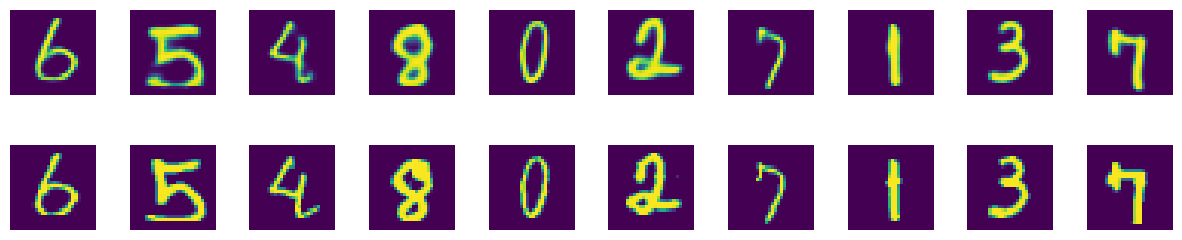

In [ ]:
# Train
plot_compare_vae(train_dset, vae, n_img=10)

1/1 [==============================] - 0s 19ms/step


2025-05-28 14:28:19.597913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_1}}]]


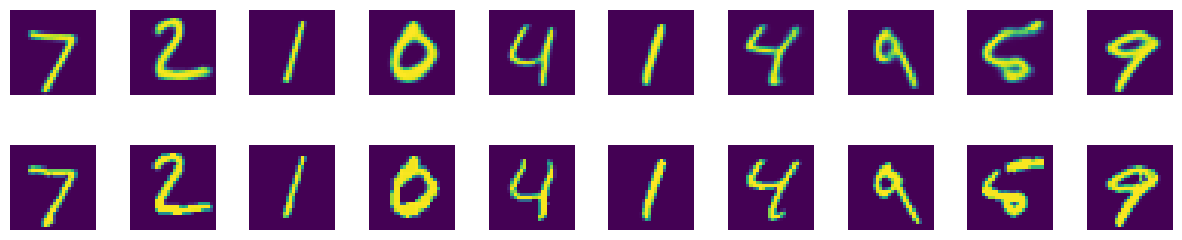

In [ ]:
# Test
plot_compare_vae(test_dset, vae, n_img=10)

**Your answer**

`1. How well does our generative model perform? Comment on what you're observing.`

The VAE performs quite well, most images look very similar to the originals. There position in space is almost intact. But we see that the model is struggling on the number 8, where it created the top part got distorted, there is also a similar problem for the 1 from the training data, where the thickness si also altered in the middle.

`2. How well does our model generalize to unseen data?`

The model has similar performance on the test set it also struggles with thickness (see digits 6 and 9) but the digits are overall well reconstructed. This was expected since the training and testing loss that were very similar.



### 4.7.5 Prior distribution

When training the encoder, the KL divergence constraints the network to predict the parametrization of the latent variable that follows a normal distribution. In the next cell, we're gonna verify this assumption.

To do so, we'll extract the latent variable for a bunch of images using the encoder. The latent variable distribution will be estimated using histograms and compared to the prior distribution. If everything went well, both should match.

In the next cells, the histogram of each component of the latent code is computed and displayed on top of the prior distribution.

**Question**

  1. Does the estimated distribution match our expectations? Comment on what you observe.

In [ ]:
from scipy.stats import norm

def latent_code_distribution(dataset, model):
  # Get latent code
  z_test = []
  for inputs in dataset.take(5):
    images = inputs[0] if isinstance(inputs, tuple) else inputs
    z, mu, log_sigma = model.predict(images)
    z_test.append(z)
  z_test = np.vstack(z_test)
  # Draw histogram
  x = np.linspace(-3, 3, 300)
  x_norm = norm.pdf(x)

  fig = plt.figure(figsize=(10, 10))
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  for i in range(16):
      ax = fig.add_subplot(4, 4, i+1)
      ax.hist(z_test[:,i], density=True, bins = 20)
      ax.axis('off')
      ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
      ax.plot(x, x_norm)
  # Done
  plt.show()

2025-05-28 14:37:09.644993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2025-05-28 14:37:09.645290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 15ms/step


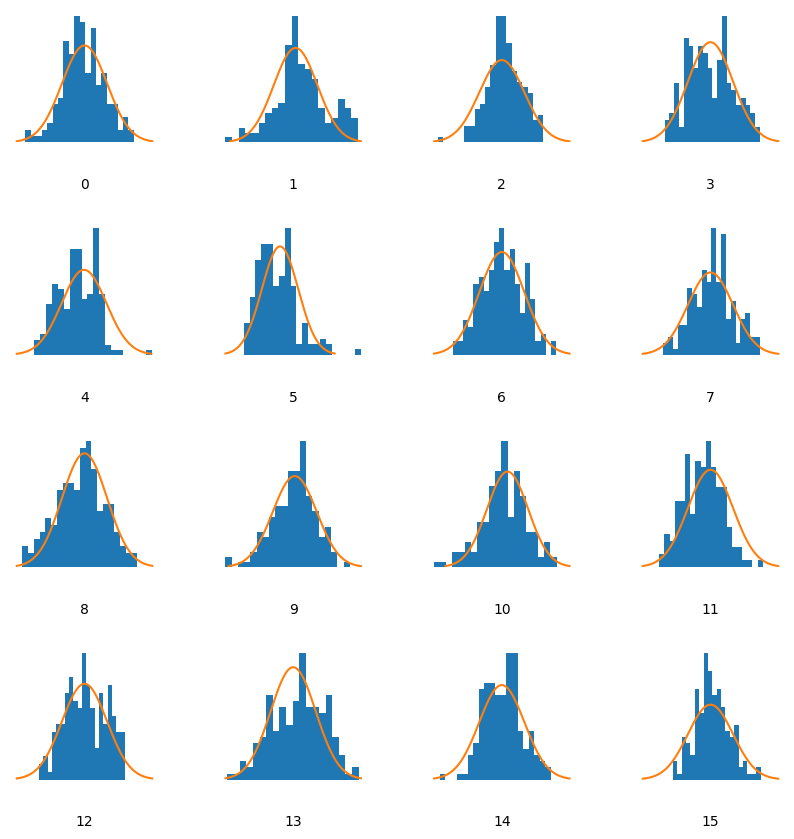

In [ ]:
# Train
latent_code_distribution(train_dset, encoder)

1/1 [==============================] - 0s 17ms/step


2025-05-28 14:37:16.425456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_1}}]]


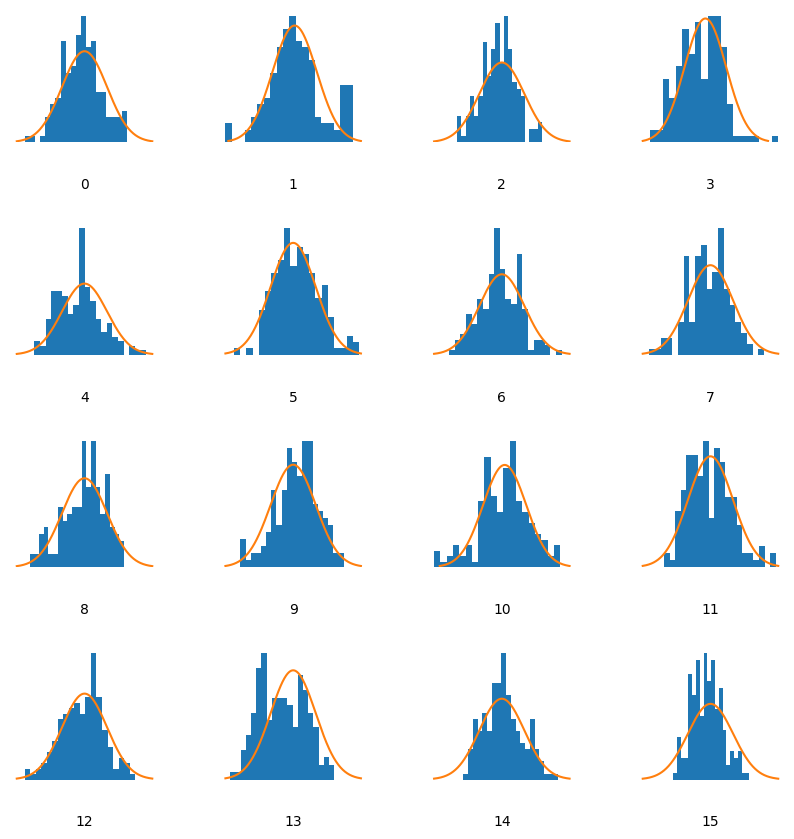

In [ ]:
# Test
latent_code_distribution(test_dset, encoder)

**Your answer**

 `1. Does the estimated distribution match our expectations? Comment on what you observe.`

The estimated distribution of the latent variables appears to roughly follow the expected standard normal distribution. Some variables from the latent space do not cover the whole range, which could cause problems when generating new examples.

### 4.7.6  Data generation

Once we have a trained variational autoencoder, we can use it to generate new data from the underlying learned distribution.

This can be achieved by using only the decoder part of the VAE and feed it with proper latent variables.

1. $z \sim \mathcal{N}\left(\boldsymbol{0}, \boldsymbol{1} \right)$
2. $\hat{x} = \text{decoder}\left(z \right)$

**Task**
 1. Generate 20 new unseen samples
 2. Comment on what you observe, does it match your expectation ? Is the quality good enough ?

1/1 [==============================] - 0s 18ms/step


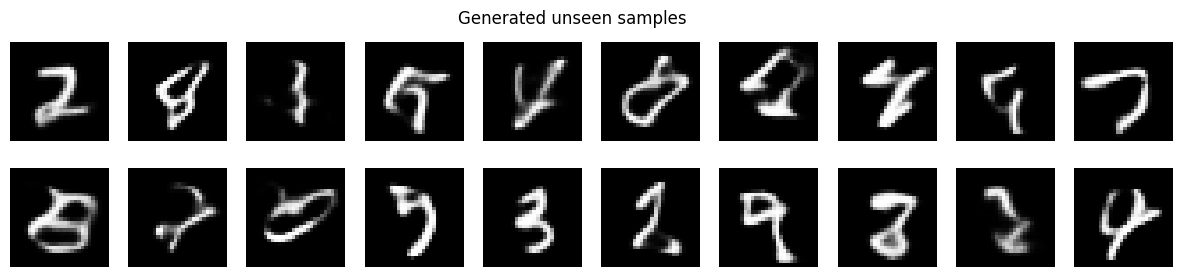

In [ ]:
# YOUR CODE HERE

# Sample z ~ N(0, I)
z = np.random.normal(size=(20, LATENT_SIZE))

# Generate new images from the decoder
generated = decoder.predict(z)

# Plot
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.suptitle("Generated unseen samples")
plt.show()


**Your answer**

`2. Comment on what you observe, does it match your expectation ? Is the quality good enough ?`

The quality of some generated samples is not fully satisfactory, some digits are hard to recognize due to distorted shapes or intensity. This outcome is somewhat expected, as the latent space may not be fully well-structured.


### 4.7.7 Latent variable interpolation

The regularization of the latent variable through the KL divergence term enforces undirectly clustering in the latent space. For instance, a data point of the latent space located halfway between the means of two encoded distributions from different training samples should be decoded into something that is somewhere between the data point that gave the first distribution and the data point that gave the second distribution. This concept is illustrated in the figure below.

![](https://miro.medium.com/max/1400/1*79AzftDm7WcQ9OfRH5Y-6g@2x.png)


In the next cell we'll try to illustrate this effect of cluster / smooth transition between two latent variables. The idea is to interpolate between two latent variables and reconstruct the corresponding image by decoding the interpolated code.

**Task**

1. Complete the implementation of the linear interpolation function
2. Going from $0$ to $2$, comment on the results and what you observe.

In [ ]:
def interpolate(a, b, alpha):
  """
  Linear interpolation between two points `a` and `b`
  :param a: First data point
  :param b: Second data point
  :param alpha: Interpolation factor in range [0, 1.0]
  :return:  Interpolated value
  """

  # YOUR CODE HERE
  return  a + (b - a) * alpha


1/1 [==============================] - 0s 17ms/step


2025-05-28 15:18:22.733513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 0s 16ms/step


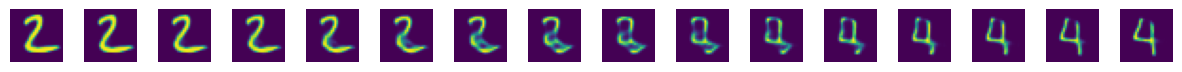

In [ ]:
def latent_interpolation(z_start, z_stop, model, n_step=10):
  """
  Linearly interpolate in latent space and decode it to get back
  the image.
  :param z_start: Starting latent code
  :param z_stop: End latent code
  :param model: Decoder model
  :param n_step:  Number of step to take
  :return: List of decoded image
  """
  images = []
  for k in range(n_step + 1):
    alpha = k / float(n_step + 1.0)
    z_interp = interpolate(z_start, z_stop, alpha)
    img = model.predict(z_interp)
    images.append(img)
  return np.concatenate(images, 0)

# Get two digits + latent code
n_step = 15
for inputs in test_dset.take(1):
  images = inputs[0] if isinstance(inputs, tuple) else inputs
  # Get latent code
  im1 = images[1, ...].numpy()
  im2 = images[24, ...].numpy()
  z, mu, log_sigma = encoder.predict(images)
  z1 = z[1, ...].reshape(1, -1)
  z2 = z[24, ...].reshape(1, -1)
  # Interpolate
  images = latent_interpolation(z_start=z1, z_stop=z2, model=decoder, n_step=n_step)

  fig = plt.figure(figsize=(15, 3))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i in range(n_step + 1):
    img = images[i, ...].squeeze()
    sub = fig.add_subplot(1, n_step + 1, i+1)
    sub.axis('off')
    sub.imshow(img)
  # Done
  plt.show()

**Your answer**

`2. Going from $0$ to $2$, comment on the results and what you observe.`

My images might be organized differently, thus my 2 images a and b are digitis 2 and 4. The change as the sampling in the latent appears smooth and linear. The digits become progressively more defined as they approach either 4 or 2, showing a clear blend between the two classes.
